Title

Description

Importing packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing data into pandas DataFrame.

In [2]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
df.sample(5)

,fire_size_class,latitude,longitude,discovery_month,weekday,Vegetation,remoteness,elevation,Temp,Wind,Humidity,Precipitation
12009,B,37.353889,-120.511944,Jul,True,NaN,0.500889,54.0,24.218343,2.550346,51.990812,8.0
6729,B,36.414100,-106.081600,Apr,True,NaN,0.357350,2126.0,9.114080,4.468783,33.006797,0.0
21202,B,37.101700,-77.796700,Jun,True,NaN,0.095639,92.0,22.510374,2.202884,66.223675,0.0
18001,B,26.175042,-98.110903,Nov,True,Shrubland,0.288596,33.0,22.052540,4.478577,71.711517,0.0
33973,F,39.934400,-119.199300,Aug,False,NaN,0.100359,1687.0,25.900984,3.395979,27.982256,0.1


Separate target variable (fire_size_class) from predictor variables.

In [3]:
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

Before doing anything, let's check the distribution of our data by plotting a histogram

d:\pycharmprojects\thesis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'remoteness'}>],
       [<AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Precipitation'}>, <AxesSubplot:>]],
      dtype=object)

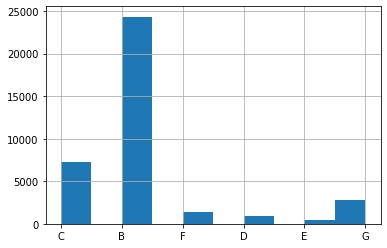

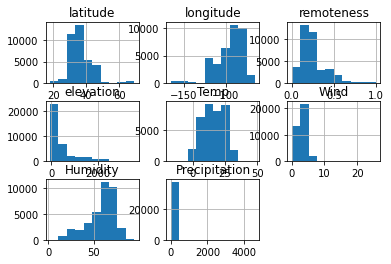

In [4]:
dfTarget.hist()
dfPredictor.hist()

Changing categorical variables into one-hot encoded ones.

In [5]:
# First let's do fire_size_class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
dfTarget.sample(5)

,B,C,D,E,F,G
18476,1,0,0,0,0,0
20027,0,0,1,0,0,0
19062,1,0,0,0,0,0
33331,1,0,0,0,0,0
23367,1,0,0,0,0,0


In [6]:
# Now Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# And discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)

# And weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True)
dfPredictor.sample(5)

,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
15730,44.693493,-73.492544,0.055143,90.0,20.901498,2.385146,61.698329,2.633333,0,0,...,0,0,0,0,0,0,0,1,0,1
1658,34.045800,-81.467200,0.129821,138.0,10.852674,2.670170,66.002392,34.333333,1,0,...,0,0,0,0,0,0,0,0,0,1
36,36.816667,-82.651667,0.138670,755.0,7.809499,3.177186,53.294648,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,1
24230,37.279400,-83.287500,0.144090,405.0,8.305211,3.044818,63.752612,38.733333,0,0,...,0,0,0,0,0,0,0,0,0,1
23400,45.180830,-122.579330,0.518951,87.0,15.331809,1.624785,70.440889,11.233333,0,0,...,0,0,0,0,0,0,0,1,1,0


Scaling numerical data to 0-1 range.

In [7]:
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
# dfPredictorScaled.sample(5)

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
dfPredictor.sample(5)

,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
18975,0.293042,0.808820,0.157453,0.087219,0.453139,0.096809,0.674553,0.00000,0,0,...,0,0,0,0,0,0,0,0,0,1
14547,0.154692,0.678746,0.282615,0.020845,0.582711,0.272844,0.778295,0.00132,0,0,...,0,0,0,1,0,0,0,0,0,1
23889,0.280148,0.798975,0.166749,0.052660,0.487328,0.114721,0.649056,0.00000,0,0,...,0,0,0,1,0,0,0,0,0,1
15772,0.499078,0.618919,0.328304,0.349973,0.544056,0.115304,0.544862,0.00261,0,0,...,0,0,0,0,0,0,0,1,1,0
25070,0.314144,0.799262,0.165296,0.101207,0.338793,0.011654,0.547295,0.00000,1,0,...,0,0,0,1,0,0,0,0,0,1


Make a correlation matrix

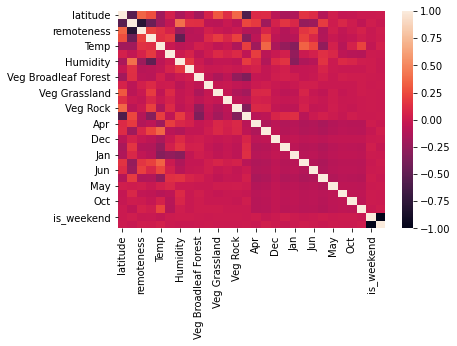

In [8]:
import seaborn as sn

corrMatrix = dfPredictor.corr()
sn.heatmap(corrMatrix)
plt.show()

Make a histogram distribution thing

Train-test split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPredictor, dfTarget, test_size=0.1, random_state=42)

Training models, each in a cell (?)

* Dummy classifier
* K-Nearest Neighbour (KNN)
* Naïve Bayes (NB)
* Support Vector Machine (SVM)
* Decision Tree (DT)
* Random Forest (RF)
* Gradient Boosted Trees (GBT)
* Multi-Layered Perceptron (MLP)
* Artificial Neural Network (ANN)

Evaluation with confusion matrix, F1 score, etc

### Dummy classifier

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)
training_accuracy = dummy_clf.score(X_train, y_train)
test_accuracy = dummy_clf.score(X_test, y_test)
print(f"Training accuracy: {training_accuracy}")  # 0.6537796074219915
print(f"Test accuracy: {test_accuracy}")  # 0.6502013422818792


Training accuracy: 0.6537796074219915
Test accuracy: 0.6502013422818792


### KNN

Trained in in 199.3469 seconds


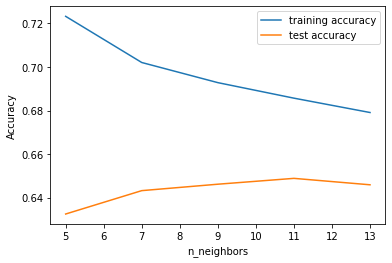

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import time  # optional for timing the code

training_accuracy = []
test_accuracy = []
nNeighbors = range(5, 15, 2)

tic = time.perf_counter()  # timing start
for nNeighbor in nNeighbors:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=nNeighbor, n_jobs=-1)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
toc = time.perf_counter()  # timing end
print(f"Trained in in {toc - tic:0.4f} seconds")  # print the time elapsed

plt.plot(nNeighbors, training_accuracy, label="training accuracy")
plt.plot(nNeighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

9 seems to be the best on our test set. Let's train that model and save it.

In [19]:
clf = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
clf.fit(X_train, y_train)

training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Number of neighbors: 9")
print(f"\nTraining accuracy: {training_accuracy}")  # 0.7298490543523656
print(f"\nTest accuracy: {test_accuracy}")  # 0.6934228187919463

Number of neighbors: 9

Training accuracy: {training_accuracy}

Test accuracy: {test_accuracy}


### Naive Bayes

In [20]:
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

# train a Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
multi_gnb = MultiOutputClassifier(gnb, n_jobs=-1)
multi_gnb.fit(X_train, y_train)
print(f"GaussianNB train score: {multi_gnb.score(X_train, y_train)}")  # 0.21296462024938845
print(f"GaussianNB test score: {multi_gnb.score(X_test, y_test)}")  # 0.21986577181208053
print("\n")


GaussianNB train score: 0.21296462024938845
GaussianNB test score: 0.21986577181208053




### Support Vector Machine

Trained in in 1017.5281 seconds


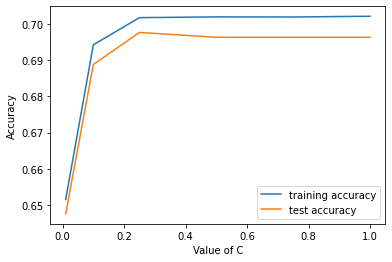

In [21]:
import time  # optional for timing the code
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

training_accuracy = []
test_accuracy = []
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]

tic = time.perf_counter()  # timing start
for c in C:
    svm = SVC(C = c)
    multi_svm = MultiOutputClassifier(svm, n_jobs=-1)
    multi_svm.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(multi_svm.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(multi_svm.score(X_test, y_test))
toc = time.perf_counter()  # timing end
print(f"Trained in in {toc - tic:0.4f} seconds")  # print the time elapsed

plt.plot(C, training_accuracy, label="training accuracy")
plt.plot(C, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Value of C")
plt.legend()

Best seems to be with C = 0.25

Now lets train the final SVM

In [22]:
svm = SVC(C = 0.25)
multi_svm = MultiOutputClassifier(svm, n_jobs=-1)
multi_svm.fit(X_train, y_train)

print(f"Kernel SVM train score: {multi_svm.score(X_train, y_train)}")  # 0.7018077680329335
print(f"Kernel SVM test score: {multi_svm.score(X_test, y_test)}")  # 0.6977181208053691
print("\n")

Kernel SVM train score: 0.7018077680329335
Kernel SVM test score: 0.6977181208053691




### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 40]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, )
grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

[0.51807742 0.70696852 0.71884132 0.69375329 0.72060144 0.71335242
 0.70965352 0.7064319  0.69828747 0.69062102 0.68259675 0.67806197
 0.6694705  0.66195332 0.63200317 0.60363344]
Test set score: 0.71


Best max_depth is 5 -->  0.72060144

In [24]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

print(f"Decision Tree train score: {dt.score(X_train, y_train)}")  # 0.7240618101545254
print(f"Decision Tree test score: {dt.score(X_test, y_test)}")  # 0.7103355704697987
print("\n")

Decision Tree train score: 0.7240618101545254
Decision Tree test score: 0.7103355704697987




### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[2,4,8,10,11,12,13,14,15,16,20,30,40]}

grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1, warm_start=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

[0.64951357 0.64647112 0.6886225  0.69414119 0.69605033 0.69542396
 0.69593106 0.69509581 0.69342516 0.69226171 0.68650428 0.67275212
 0.67248354]
Test set score: 0.69


Best seems to be with max_depth=12

In [26]:
rf = RandomForestClassifier(max_depth=12, n_jobs=-1)
rf.fit(X_train, y_train)

print(f"Random Forest train score: {rf.score(X_train, y_train)}")  # 0.7210786945886284
print(f"Random Forest test score: {rf.score(X_test, y_test)}")  # 0.6877852348993289
print("\n")


Random Forest train score: 0.7187220332915697
Random Forest test score: 0.6885906040268457




### Gradient Boosted Trees (GBT)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

param_grid = {'estimator__max_depth':[2,4,8,16,30,40], 'estimator__loss':['deviance', 'exponential']}

gbt = MultiOutputClassifier(GradientBoostingClassifier(verbose=0, warm_start=True))
grid_search = GridSearchCV(gbt, param_grid, cv=5)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

print('Best parameters found:\n', grid_search.best_params_)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

KeyboardInterrupt: 

### Multi-Layered Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(5, 10, 5), (15, 30, 15), (5, 10, 10, 5), (15, 30, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=5)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print('Best parameters found:\n', grid_search.best_params_)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
